number of historical data= 15540


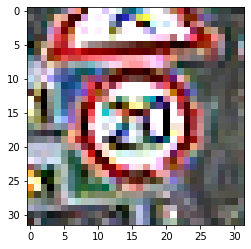

number of test data= 89


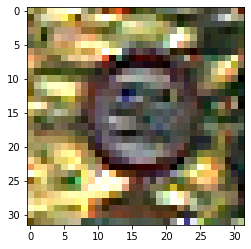

In [76]:
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
from PIL import Image
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import cv2

def readTrafficSigns(rootpath,N):
    '''Reads traffic sign data 
    Arguments: path to the traffic sign data, for example './TrafficSignData/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over N classes, at most we have 42 classes
    for c in range(0,N):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        #gtReader.next() # skip header
        next(gtReader)
        # loop over all images in current annotations file
        for row in gtReader:
            img=Image.open(prefix + row[0])  # the 1th column is the filename
            # preprocesing image, make sure the images are in the same size
            img=img.resize((32,32), Image.BICUBIC)
            kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32) #定义一个核
            
            img=np.array(img)
            img = cv2.filter2D(img, -1, kernel=kernel)
            # change train image to gray
            images.append(img) 
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

# load the images
trainImages, trainLabels = readTrafficSigns('TrafficSignData/Training',15)
# print number of historical images
print('number of historical data=', len(trainLabels))
# show one sample image
plt.imshow(trainImages[0])
plt.show()

#load the test images
testImages, testLabels = readTrafficSigns('TrafficSignData/Testing',1)
# print number of Testing images
print('number of test data=', len(testLabels))
# show one sample test image
plt.imshow(testImages[15])
plt.show()


# design the input and output for model
X=[]
Y=[]
for i in range(0,len(trainLabels)):
    # input X just the flattern image, you can design other features to represent a image
    X.append(trainImages[i].flatten())
    Y.append(int(trainLabels[i]))
X=np.array(X)
Y=np.array(Y)


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Logistic result:  0.9929786137593404
Logistic testsets result:  0.9375


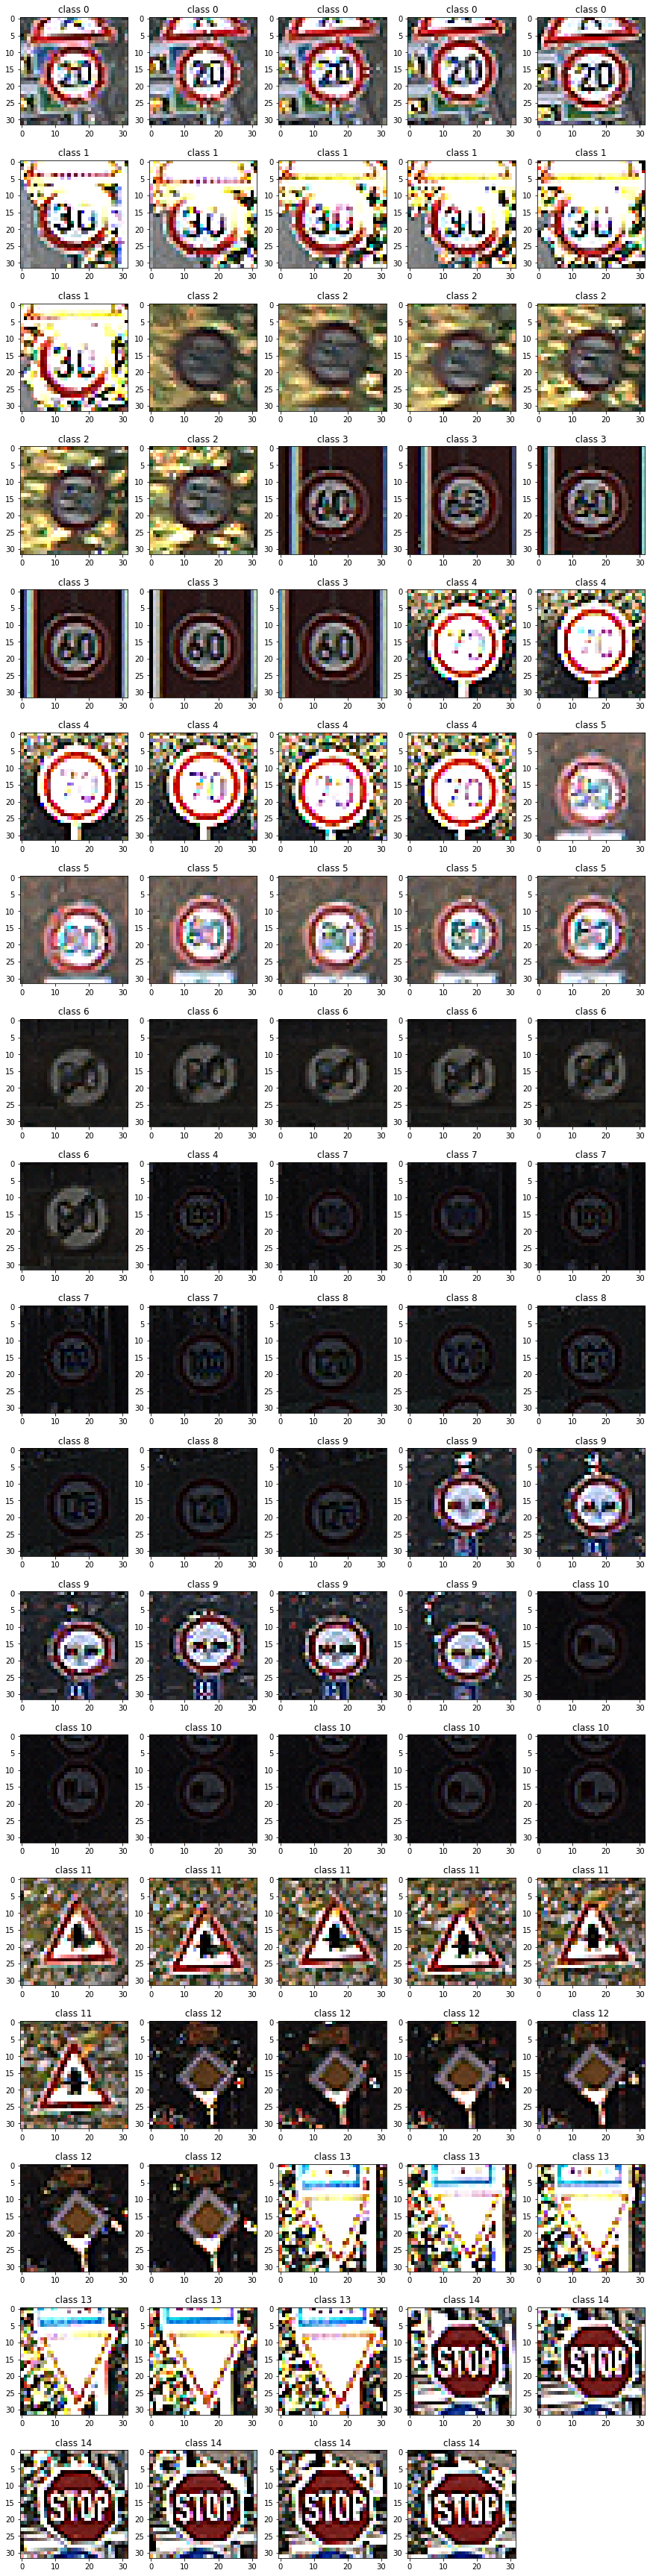

Logistic final Classification Accuracy:


0.9775280898876404

In [77]:
#logistics regression
#Create an instance of Logistic Regression Classifier
logreg = LogisticRegression(C=1, solver="sag")
#Split dateset into random train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.001, random_state=0)
#Fit the data.
logreg.fit(X_train, Y_train)
#Print out the accuracy of the train and test subsets
print('Logistic result: ',logreg.score(X_train,Y_train))
print('Logistic testsets result: ',logreg.score(X_test,Y_test))


# predict over training data 
# test-image set pre-prepare
X_testSet=[]
Y_testSet=[]
for i in range(0,len(testLabels)):
    X_testSet.append(testImages[i].flatten())
    Y_testSet.append(int(testLabels[i]))
X_testSet=np.array(X_testSet)
Y_testSet=np.array(Y_testSet)
Ypred=logreg.predict(X_testSet)

# print classification result
plt.figure(figsize=(15,70))
for i in range(0,len(testLabels)):
    plt.subplot(20,5,i+1)
    plt.title('class '+str(Ypred[i]))
    plt.imshow(testImages[i])
plt.show()

# check the accuracy
print('Logistic final Classification Accuracy:')
accuracy_score(Y_testSet,Ypred)


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM result:  0.9989049214120073
SVM testsets result:  0.875


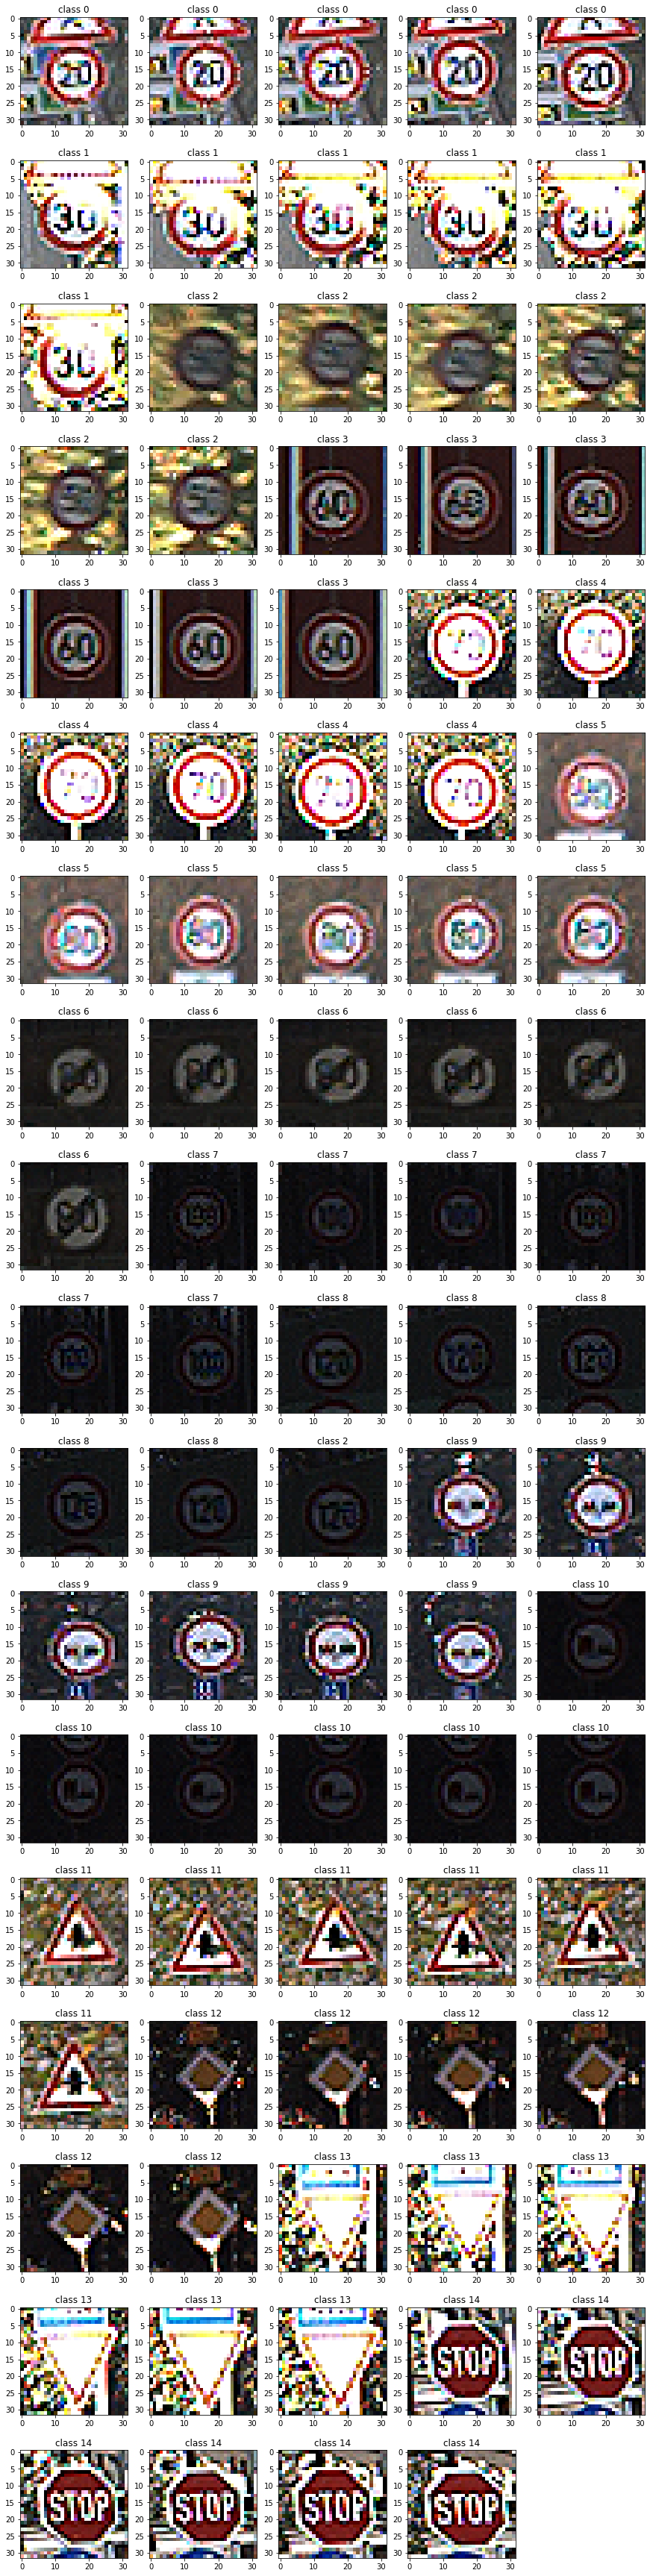

SVM final Classification Accuracy:


0.9887640449438202

In [81]:
#train a SVM
lin_clf = svm.LinearSVC(C=1)
#Split dateset into random train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.001, random_state=0)

lin_clf.fit(X_train, Y_train)
#Print out the accuracy of the train and test subsets
print('SVM result: ',lin_clf.score(X_train,Y_train))
print('SVM testsets result: ',lin_clf.score(X_test,Y_test))

# predict over training data 
# test-image set pre-prepare
X_testSet=[]
Y_testSet=[]
for i in range(0,len(testLabels)):
    X_testSet.append(testImages[i].flatten())
    Y_testSet.append(int(testLabels[i]))
X_testSet=np.array(X_testSet)
Y_testSet=np.array(Y_testSet)
lin_clf_Ypred=lin_clf.predict(X_testSet)

# print classification result
plt.figure(figsize=(15,70))
for i in range(0,len(testLabels)):
    plt.subplot(20,5,i+1)
    plt.title('class '+str(lin_clf_Ypred[i]))
    plt.imshow(testImages[i])
plt.show()

# check the accuracy
print('SVM final Classification Accuracy:')
accuracy_score(Y_testSet,lin_clf_Ypred)


Iteration 1, loss = 1.42281581
Iteration 2, loss = 0.57661088
Iteration 3, loss = 0.32572865
Iteration 4, loss = 0.27411945
Iteration 5, loss = 0.20345775
Iteration 6, loss = 0.15508122
Iteration 7, loss = 0.12861850
Iteration 8, loss = 0.10305884
Iteration 9, loss = 0.10134247
Iteration 10, loss = 0.07359901
MLP Training set score: 0.989
MLP Test set score: 0.938


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


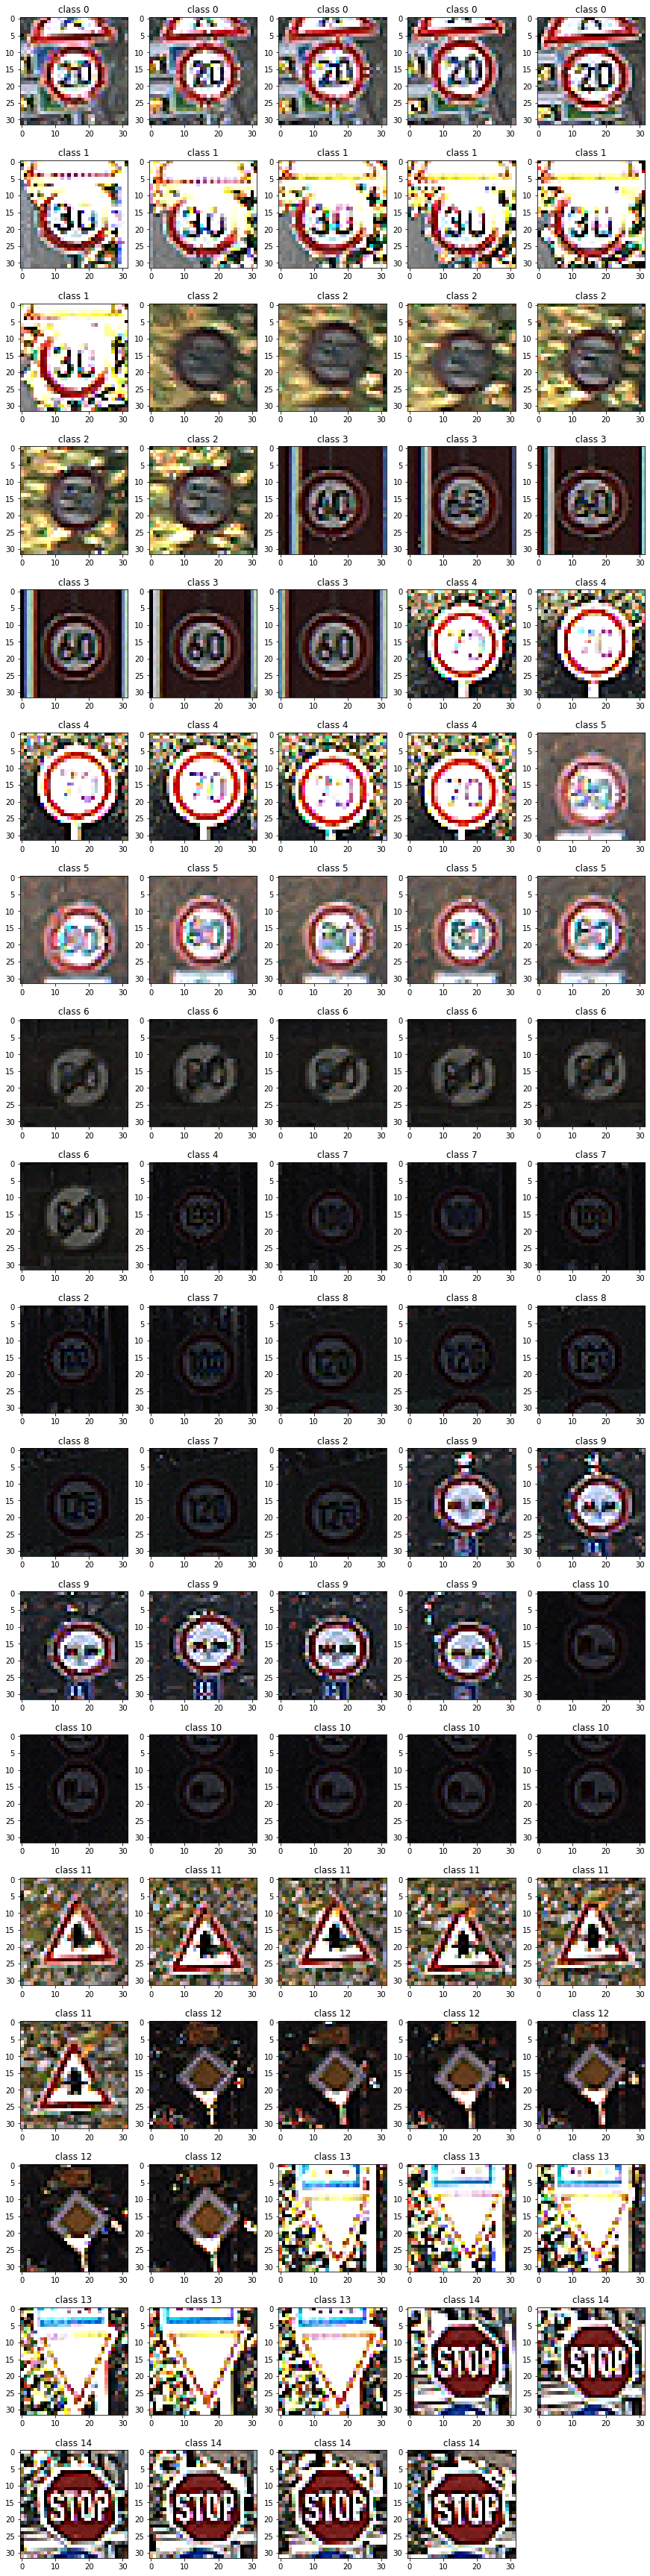

MLP final Classification Accuracy:


0.9550561797752809

In [79]:
from sklearn.neural_network import MLPClassifier

# train a MLP
mlp = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=10, alpha=1e-4, 
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)


X = X/500.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.001, random_state=0)

mlp.fit(X_train, Y_train)


print(f"MLP Training set score: {mlp.score(X_train, Y_train):.3f}")
print(f"MLP Test set score: {mlp.score(X_test, Y_test):.3f}")

# predict over training data 
# test-image set pre-prepare
X_testSet=[]
Y_testSet=[]
for i in range(0,len(testLabels)):
    X_testSet.append(testImages[i].flatten())
    Y_testSet.append(int(testLabels[i]))
X_testSet=np.array(X_testSet)
Y_testSet=np.array(Y_testSet)
Ypred=mlp.predict(X_testSet)

# print classification result
plt.figure(figsize=(15,70))
for i in range(0,len(testLabels)):
    plt.subplot(20,5,i+1)
    plt.title('class '+str(Ypred[i]))
    plt.imshow(testImages[i])
plt.show()

# check the accuracy
print('MLP final Classification Accuracy:')

accuracy_score(Y_testSet,Ypred)


In [80]:
# cross validation
from sklearn.model_selection import cross_val_score
# Compute three score vectores
scores1 = cross_val_score(logreg, X_train, Y_train, cv=5)
scores2 = cross_val_score(lin_clf, X_train, Y_train, cv=5)
scores3 = cross_val_score(mlp, X_train, Y_train, cv=5)

# Compute two mean scores and print out 
print("Logistic Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))
print("MLP Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: Conve

Iteration 1, loss = 1.55598820
Iteration 2, loss = 2.69395195
Iteration 3, loss = 1.62811706
Iteration 4, loss = 1.23540676
Iteration 5, loss = 1.35340292
Iteration 6, loss = 1.54634929
Iteration 7, loss = 1.12991232
Iteration 8, loss = 0.90920140
Iteration 9, loss = 1.00632738
Iteration 10, loss = 0.83585127


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.58661819
Iteration 2, loss = 0.80419179
Iteration 3, loss = 0.43034327
Iteration 4, loss = 0.33660765
Iteration 5, loss = 0.23955189
Iteration 6, loss = 0.18236359
Iteration 7, loss = 0.15539830
Iteration 8, loss = 0.23277647
Iteration 9, loss = 0.44471746
Iteration 10, loss = 0.15047759


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.56873677
Iteration 2, loss = 0.65895937
Iteration 3, loss = 0.39667032
Iteration 4, loss = 0.46420315
Iteration 5, loss = 0.63623318
Iteration 6, loss = 0.27183684
Iteration 7, loss = 0.21572969
Iteration 8, loss = 0.20196789
Iteration 9, loss = 0.17010439
Iteration 10, loss = 0.16667293


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.60490649
Iteration 2, loss = 0.66701424
Iteration 3, loss = 0.44938817
Iteration 4, loss = 0.30251553
Iteration 5, loss = 0.23658307
Iteration 6, loss = 0.17680756
Iteration 7, loss = 0.15509943
Iteration 8, loss = 0.11710837
Iteration 9, loss = 0.11025908
Iteration 10, loss = 0.08664044


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.57895446
Iteration 2, loss = 0.91109141
Iteration 3, loss = 0.55285133
Iteration 4, loss = 2.18282651
Iteration 5, loss = 2.08802345
Iteration 6, loss = 1.83556803
Iteration 7, loss = 1.56088375
Iteration 8, loss = 1.49350879
Iteration 9, loss = 1.42339135
Iteration 10, loss = 1.60447619
Logistic Accuracy: 0.94 (+/- 0.01)
SVM Accuracy: 0.92 (+/- 0.01)
MLP Accuracy: 0.71 (+/- 0.33)


/Users/fby/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
